In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd/content/gdrive/MyDrive/707/Assgment2

/content/gdrive/MyDrive/707/Assgment2


In [ ]:
ls

 612OnlineRetail.ipynb                online_retail_I.xlsx                   winequality.names
 707Wine.ipynb                        OnlineRetail-PySpark.ipynb             winequality-red.csv
'clean datasets OnlineRetails.docx'   OnlineRetail_test.ipynb                winequality-white.csv
 combined_data.csv                    OnlineRetail.xlsx
 OnlineRetail2.xlsx                  'Real estate valuation data set.xlsx'


In [ ]:
pip install plotly dash pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 44.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
# Read OnlineRetail.xlsx and OnlineRetail2.xlsx
OnlineRetail = pd.read_excel('OnlineRetail.xlsx')
OnlineRetail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
OnlineRetail2 = pd.read_excel('OnlineRetail2.xlsx')
OnlineRetail2.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Display the summary information of the dataset, including data types and non-null counts
print("\nSummary information of the dataset:")
OnlineRetail.info()
OnlineRetail2.info()

# Display basic statistical details like mean, median, standard deviation, etc., for numeric columns
print("\nBasic statistical details for numeric columns:")
OnlineRetail.describe()
OnlineRetail2.describe()


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockC

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
# Check for missing values
missing_values = OnlineRetail.isnull().sum()
print("Missing values Online Retail:")
print(missing_values)
missing_values2 = OnlineRetail2.isnull().sum()
print("Missing values Online Retail2:")
print(missing_values2)

Missing values Online Retail:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Missing values Online Retail2:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [ ]:
OnlineRetail.shape

(541909, 8)

In [ ]:
OnlineRetail2.shape

(525461, 8)

In [ ]:
# Check the number of duplicate rows
print("Number of duplicate rows OnlineRetail before removing duplicates:", OnlineRetail['InvoiceNo'].duplicated().sum())
print("Number of duplicate rows OnlineRetail2 before removing duplicates:", OnlineRetail2['Invoice'].duplicated().sum())

Number of duplicate rows OnlineRetail before removing duplicates: 516009
Number of duplicate rows OnlineRetail2 before removing duplicates: 496645


In [ ]:
duplicate_records = OnlineRetail.groupby("InvoiceNo")['InvoiceNo'].count().reset_index(name='count').query('count > 1')
print("Duplicate Records:")
print(duplicate_records)

Duplicate Records:
      InvoiceNo  count
0        536365      7
1        536366      2
2        536367     12
3        536368      4
5        536370     20
...         ...    ...
25891   C581465      4
25892   C581466      5
25893   C581468      2
25896   C581490      2
25899   C581569      2

[20059 rows x 2 columns]


In [ ]:
duplicate_records2 = OnlineRetail2.groupby("Invoice")['Invoice'].count().reset_index(name='count').query('count > 1')
print("Duplicate Records2:")
print(duplicate_records2)

Duplicate Records2:
       Invoice  count
0       489434      8
1       489435      4
2       489436     19
3       489437     23
4       489438     17
...        ...    ...
28808  C538115      4
28809  C538118      3
28810  C538119      3
28813  C538123      3
28814  C538124      3

[20811 rows x 2 columns]


In [ ]:
# Remove duplicate rows
OnlineRetail.drop_duplicates(inplace=True)
OnlineRetail2.drop_duplicates(inplace=True)

# Check the number of duplicate rows after removing duplicates
print("Number of duplicate rows after removing duplicates:", OnlineRetail.duplicated().sum())
print("Number of duplicate rows after removing duplicates:", OnlineRetail2.duplicated().sum())

Number of duplicate rows after removing duplicates: 0
Number of duplicate rows after removing duplicates: 0


In [ ]:
OnlineRetail.shape


(401604, 8)

In [ ]:
OnlineRetail2.shape


(518596, 8)

In [ ]:
 # Convert data types if necessary
OnlineRetail['InvoiceDate'] = pd.to_datetime(OnlineRetail['InvoiceDate'])
OnlineRetail2['InvoiceDate'] = pd.to_datetime(OnlineRetail2['InvoiceDate'])

In [ ]:
 # Total sales by product
sales_by_product = OnlineRetail.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(sales_by_product)

# Total sales by country
sales_by_country = OnlineRetail.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print(sales_by_country)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53119
JUMBO BAG RED RETROSPOT                44963
ASSORTED COLOUR BIRD ORNAMENT          35215
WHITE HANGING HEART T-LIGHT HOLDER     34128
PACK OF 72 RETROSPOT CAKE CASES        33386
                                       ...  
PINK POODLE HANGING DECORATION           -12
CRUK Commission                          -16
ASSORTED TUTTI FRUTTI ROUND BOX          -24
Discount                               -1194
ROTATING SILVER ANGELS T-LIGHT HLDR    -1475
Name: Quantity, Length: 3896, dtype: int64
Country
United Kingdom          3994870
Netherlands              200128
EIRE                     136187
Germany                  117341
France                   109806
Australia                 83643
Sweden                    35632
Switzerland               29778
Spain                     26817
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16017
Finland                   

In [ ]:
 # Total sales by product
sales_by_product = OnlineRetail2.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(sales_by_product)

# Total sales by country
sales_by_country = OnlineRetail2.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print(sales_by_country)

Description
WHITE HANGING HEART T-LIGHT HOLDER    57632
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54554
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46079
ASSORTED COLOUR BIRD ORNAMENT         44805
                                      ...  
Zebra invcing error                   -9000
ebay sales                           -13630
missing                              -15149
given away                           -20000
?                                    -25373
Name: Quantity, Length: 4681, dtype: int64
Country
United Kingdom          4410572
Denmark                  227030
EIRE                     188659
Netherlands              181822
Germany                  107026
France                    74317
Sweden                    52226
Switzerland               22053
Australia                 20053
Spain                     18317
Belgium                   11974
Portugal                  11875
Channel Islands           10994
Norway                     7863
Italy

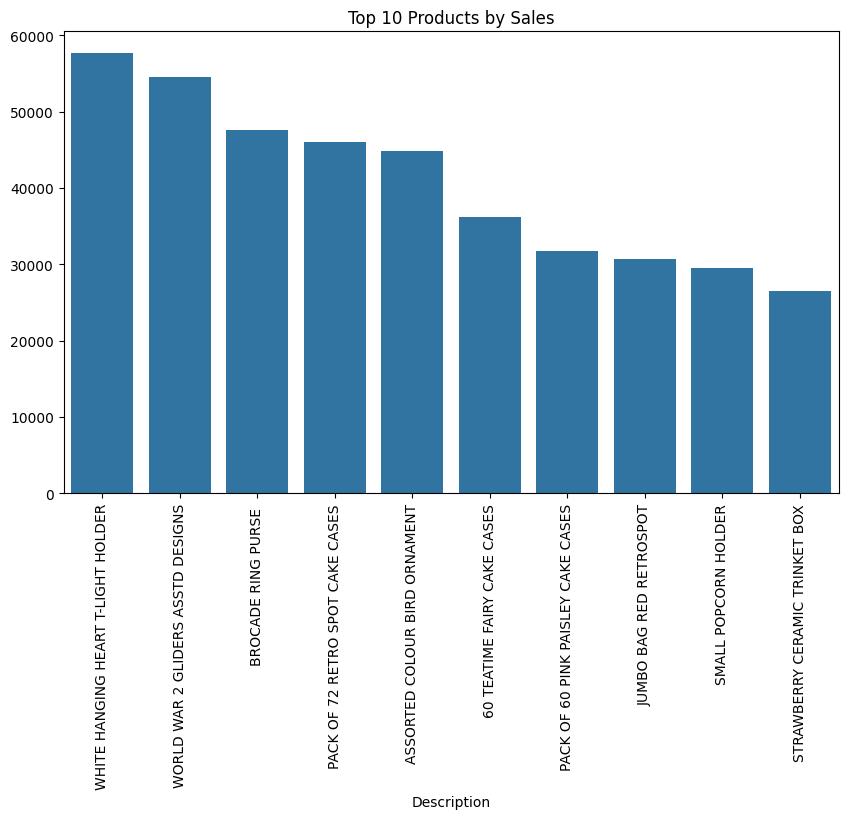

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales by product
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.index[:10], y=sales_by_product.values[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Products by Sales')
plt.show()

In [ ]:
OR_head = OnlineRetail.head(10)
print("Head of OnlineRetail:")
print(OR_head)
OR_head2 = OnlineRetail2.head(10)
print("Head of OnlineRetail2:")
print(OR_head2)

Head of OnlineRetail:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdo

In [ ]:
# Assuming 'StockCode' is the common key, merge both DataFrames
#combined_data = pd.merge(OnlineRetail, OnlineRetail2, on='StockCode')

combined_data = pd.concat([OR_head, OR_head2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_file = 'combined_data.csv'
combined_data.to_csv(combined_csv_file, index=False)

print(f"Combined data saved to {combined_data}")


Combined data saved to    InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10       NaN     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
11       NaN    79323P                   PINK CHERRY LIGHTS        12   
12       NaN    79323W      

In [ ]:
print(combined_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Invoice  Price  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     NaN    NaN   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     NaN    NaN   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     NaN    NaN   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     NaN    NaN   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     NaN    NaN   

   Customer ID  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4      

In [ ]:
# Calculate SalesTotal
combined_data['SalesTotal'] = combined_data['Quantity'] * combined_data['Price']

# Total sales across all transactions
total_sales = combined_data['SalesTotal'].sum()
print("\nTotal Sales Across All Transactions: ${:.2f}".format(total_sales))


Total Sales Across All Transactions: $580.90


In [ ]:
# Sales by Product Category
sales_by_category = combined_data.groupby('ProductCategory')['SalesTotal'].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(sales_by_category)

KeyError: 'ProductCategory'

In [ ]:
# Perform analysis: Product categories sold by country
sales_by_country_category = combined_data.groupby(['Country', 'ProductCategory'])['SalesTotal'].sum().reset_index()
print("\nProduct categories sold by country:")
print(sales_by_country_category)


Product categories sold by country:
           Country             Description    SalesTotal
0        Australia    CHRISTMAS GLASS BALL   3516.563075
1        Australia      PINK CHERRY LIGHTS   3776.802260
2        Australia            RECORD FRAME   2546.112521
3        Australia  STRAWBERRY TRINKET BOX   2233.767663
4        Australia     WHITE CHERRY LIGHTS   2371.883058
5           Canada    CHRISTMAS GLASS BALL   1395.507689
6           Canada      PINK CHERRY LIGHTS    310.249485
7           Canada            RECORD FRAME    987.028565
8           Canada     WHITE CHERRY LIGHTS   1500.299666
9            China    CHRISTMAS GLASS BALL    795.891013
10           China      PINK CHERRY LIGHTS    127.793097
11           China            RECORD FRAME    684.144493
12           China  STRAWBERRY TRINKET BOX   1011.664273
13           China     WHITE CHERRY LIGHTS   2910.745780
14          France    CHRISTMAS GLASS BALL   2204.193800
15          France      PINK CHERRY LIGHTS   2684.6

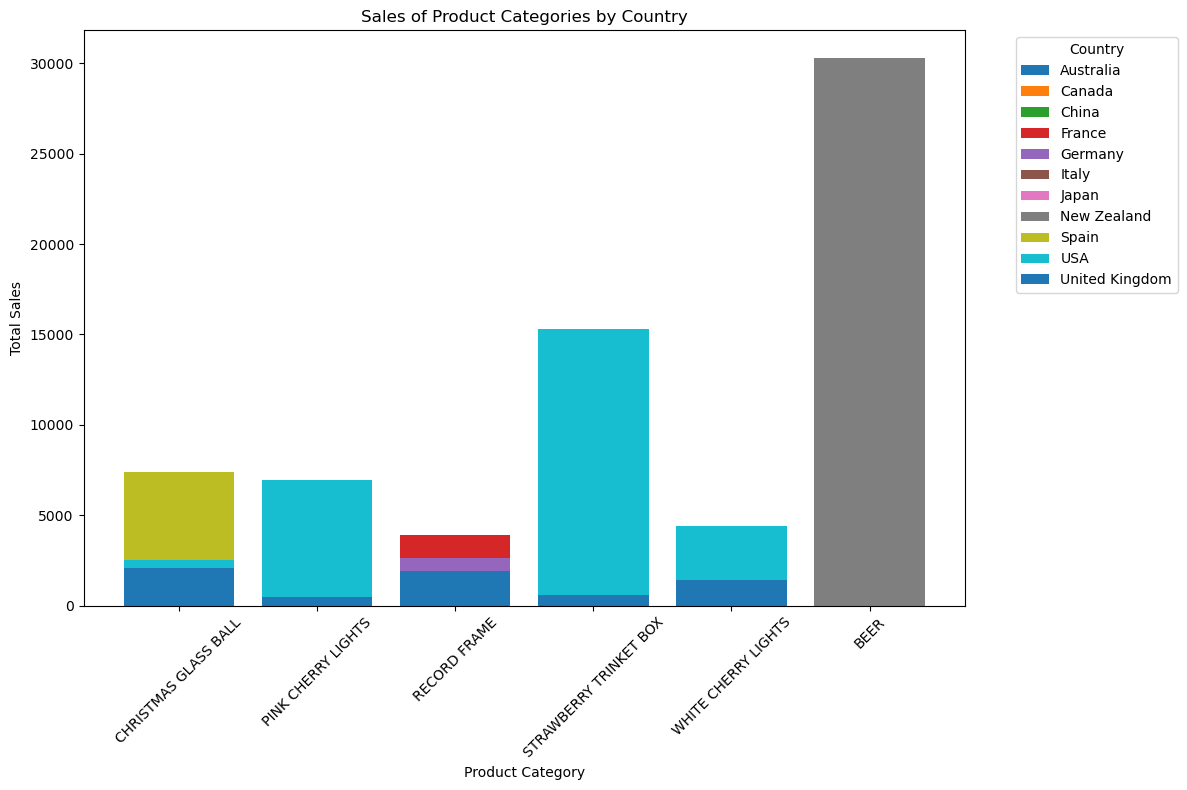

In [ ]:
# Group by Country and ProductCategory, sum SalesTotal
sales_by_country_category = combined_data.groupby(['Country', 'ProductCategory'])['SalesTotal'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for country in sales_by_country_category['Country'].unique():
    data_country = sales_by_country_category[sales_by_country_category['Country'] == country]
    plt.bar(data_country['ProductCategory'], data_country['SalesTotal'], label=country)

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales of Product Categories by Country')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TRYING DIFFERENT APPROACH WITH PYSPARK